In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "calabria"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,11.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,18,Calabria,0,0,0,1,1,1,1,...,0.0,7.0,0.0,1.0,0.00,0.00,14.29,0.00,0.00,0.00
4,2020-02-29T17:00:00,18,Calabria,0,0,0,1,1,0,0,...,0.0,6.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-14T17:00:00,18,Calabria,206,22,228,6524,6752,35,151,...,5.0,2271.0,2035.0,46.0,9.65,3.38,6.65,7.42,0.00,0.52
356,2021-02-15T17:00:00,18,Calabria,195,22,217,6529,6746,-6,128,...,2.0,1406.0,1364.0,5.0,10.14,3.22,9.10,9.38,0.00,-0.09
357,2021-02-16T17:00:00,18,Calabria,197,20,217,6443,6660,-86,121,...,1.0,2171.0,2020.0,-86.0,9.22,3.26,5.57,5.99,-9.09,-1.27
358,2021-02-17T17:00:00,18,Calabria,179,18,197,6334,6531,-129,170,...,7.0,2567.0,2277.0,-109.0,9.14,3.02,6.62,7.47,-10.00,-1.94


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 18, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 166
Nuovi tamponi: 2069.0
Percentuale nuovi positivi/nuovi tamponi: 8.0 %
Nuovi guariti: 230.0
Nuovi deceduti: 2.0
Variazione positivi ricoverati con sintomi: -6.0
Variazione positivi in terapia intensiva: 2.0
Variazione positivi in isolamento dimiciliare: -62.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 18, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-20T17:00:00,18,Calabria,287,22,309,8160,8469,-38,224,...,1.0,1926.0,1926.0,-36.0,7.12,3.65,11.63,11.63,4.76,-0.45
1,2020-12-21T17:00:00,18,Calabria,300,22,322,7999,8321,-148,110,...,7.0,1397.0,1352.0,-161.0,6.83,3.87,7.87,8.14,0.00,-1.75
2,2020-12-22T17:00:00,18,Calabria,292,23,315,8156,8471,150,232,...,5.0,2845.0,1917.0,157.0,7.30,3.72,8.15,12.10,4.55,1.80
3,2020-12-23T17:00:00,18,Calabria,297,19,316,7926,8242,-229,284,...,2.0,3505.0,3271.0,-230.0,6.01,3.83,8.10,8.68,-17.39,-2.70
4,2020-12-24T17:00:00,18,Calabria,284,21,305,8054,8359,117,244,...,1.0,3314.0,1859.0,128.0,6.89,3.65,7.36,13.13,10.53,1.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-14T17:00:00,18,Calabria,206,22,228,6524,6752,35,151,...,5.0,2271.0,2035.0,46.0,9.65,3.38,6.65,7.42,0.00,0.52
57,2021-02-15T17:00:00,18,Calabria,195,22,217,6529,6746,-6,128,...,2.0,1406.0,1364.0,5.0,10.14,3.22,9.10,9.38,0.00,-0.09
58,2021-02-16T17:00:00,18,Calabria,197,20,217,6443,6660,-86,121,...,1.0,2171.0,2020.0,-86.0,9.22,3.26,5.57,5.99,-9.09,-1.27
59,2021-02-17T17:00:00,18,Calabria,179,18,197,6334,6531,-129,170,...,7.0,2567.0,2277.0,-109.0,9.14,3.02,6.62,7.47,-10.00,-1.94


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

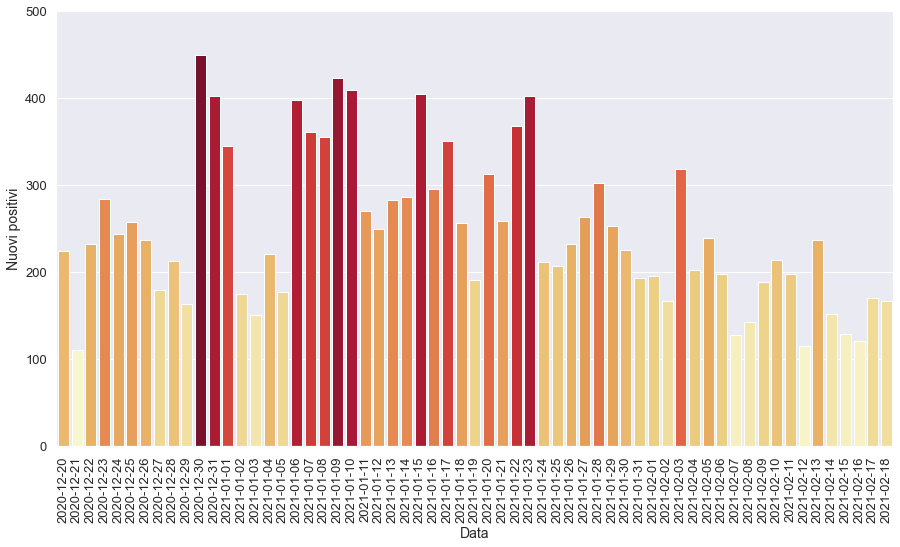

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

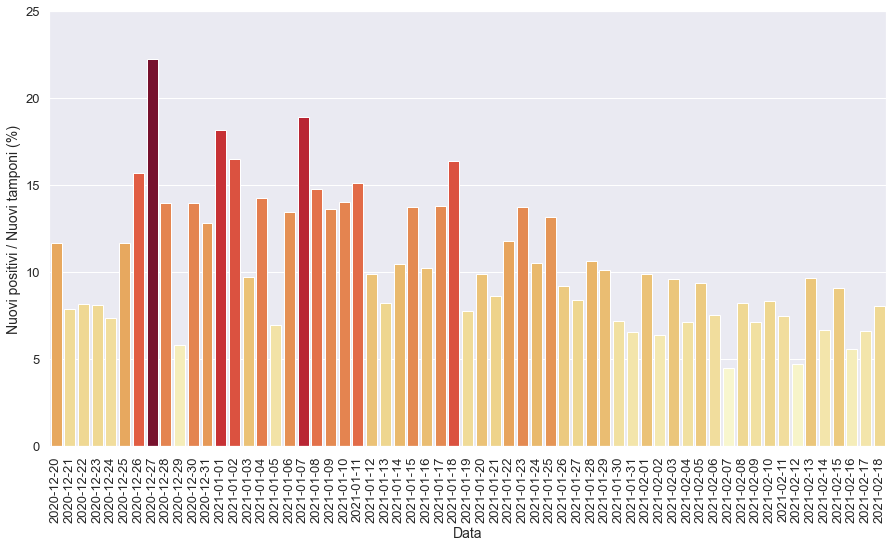

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

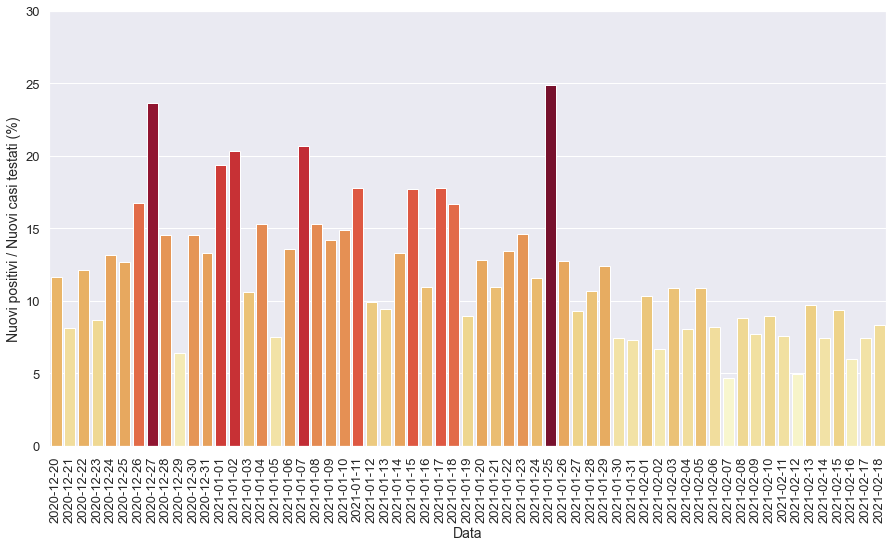

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

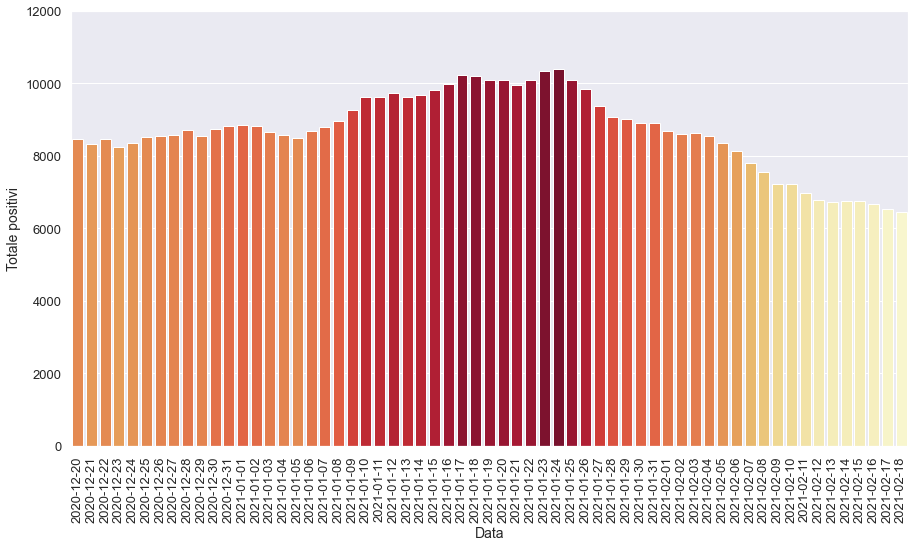

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

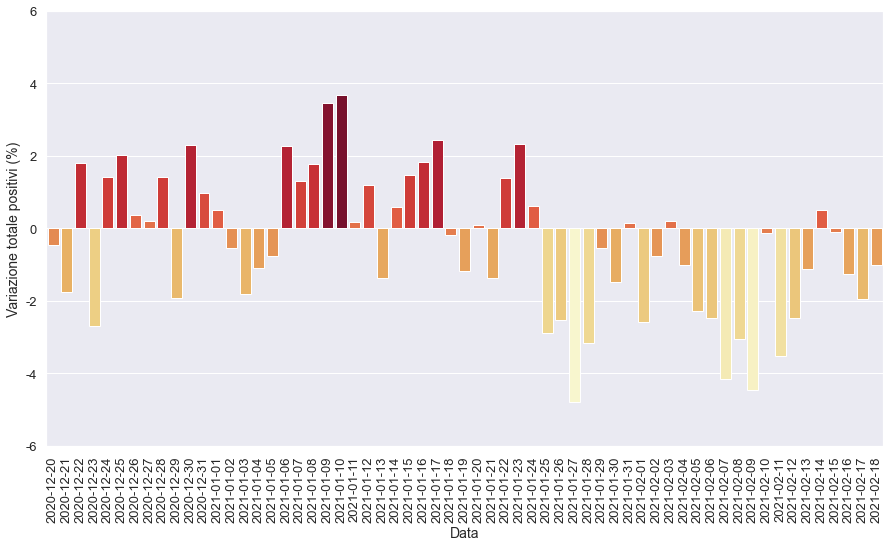

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

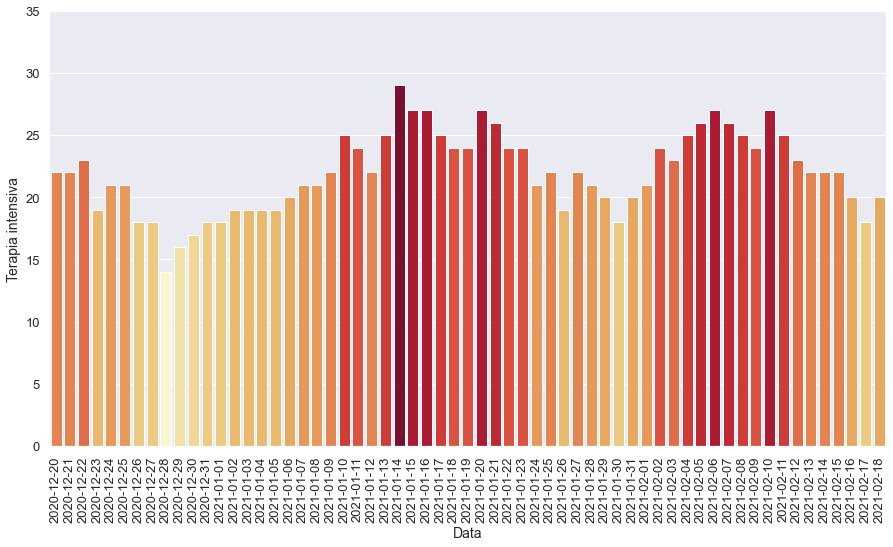

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

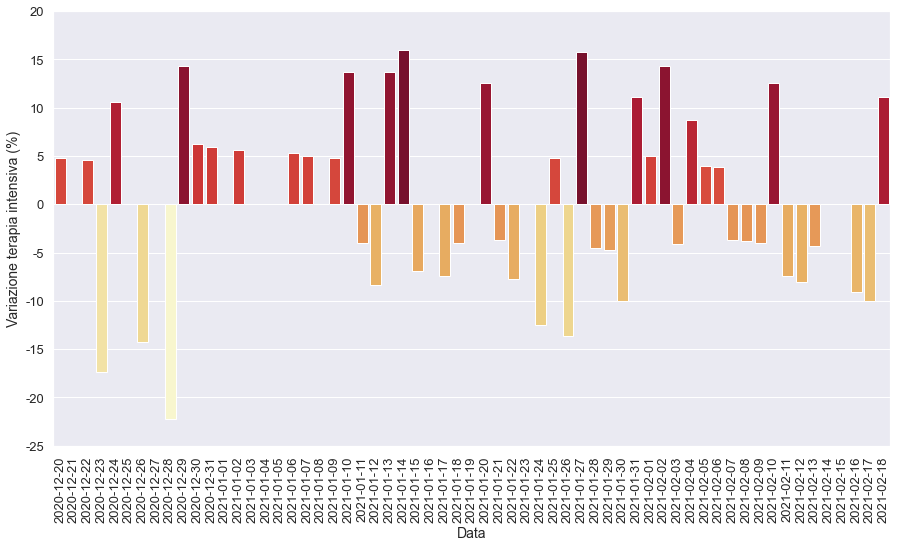

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

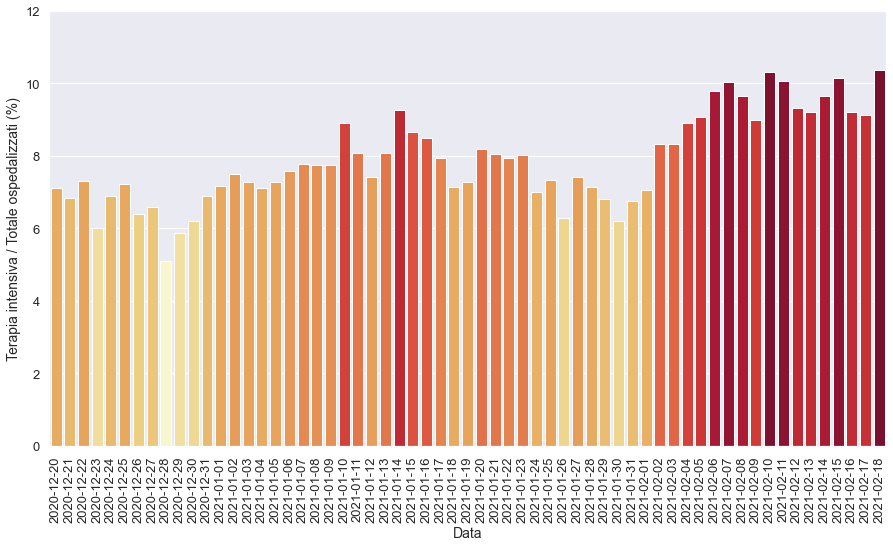

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

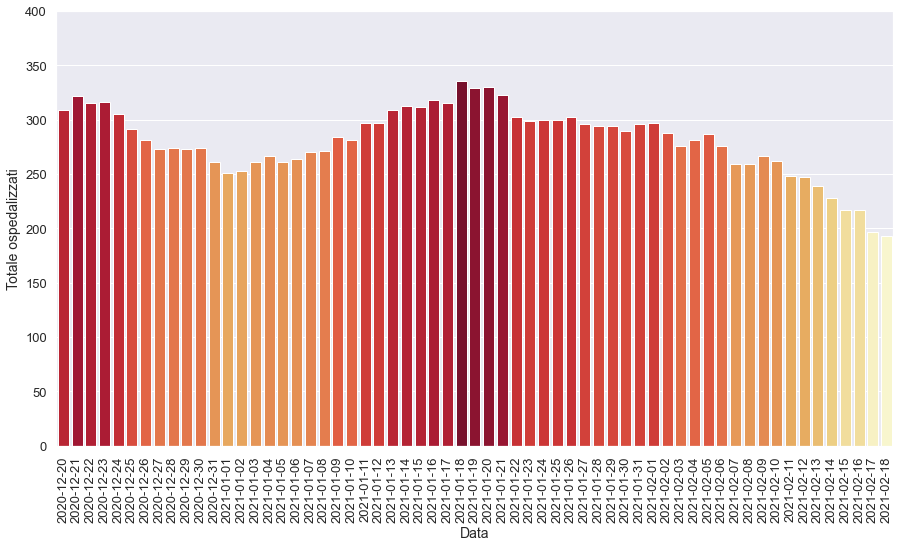

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

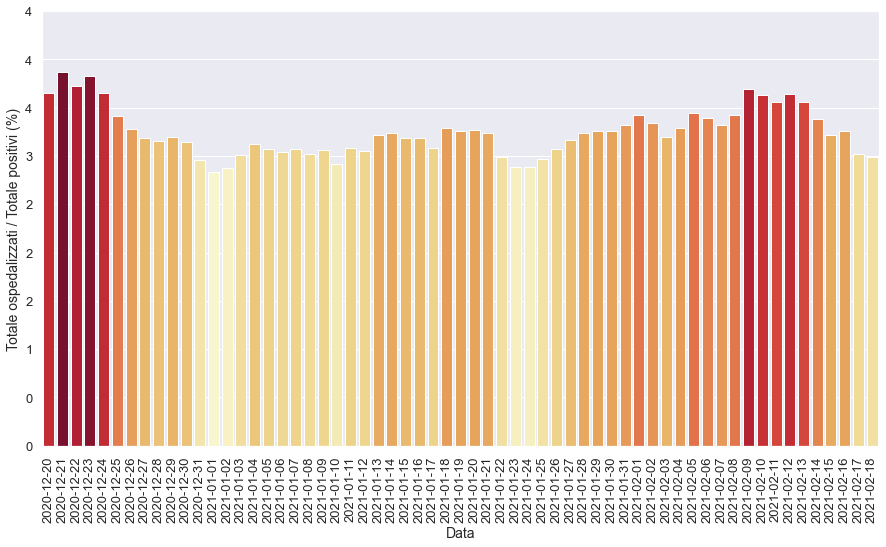

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

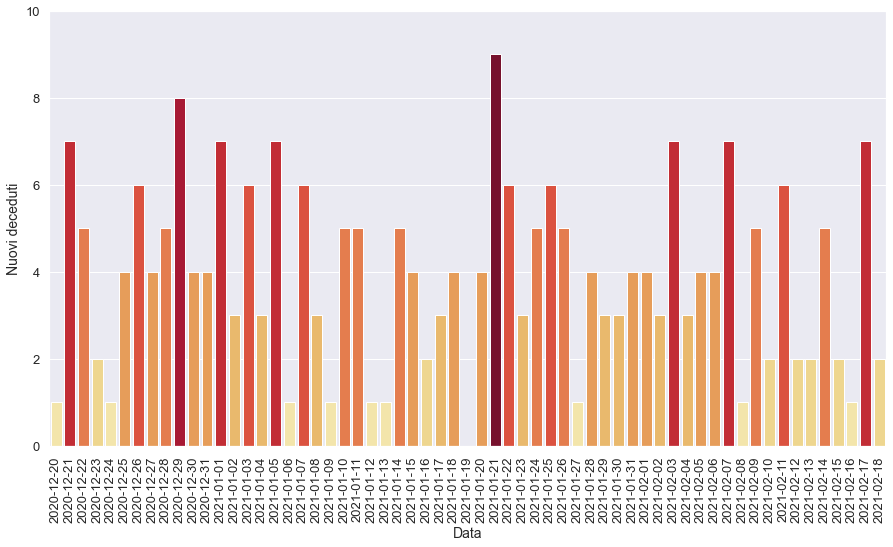

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

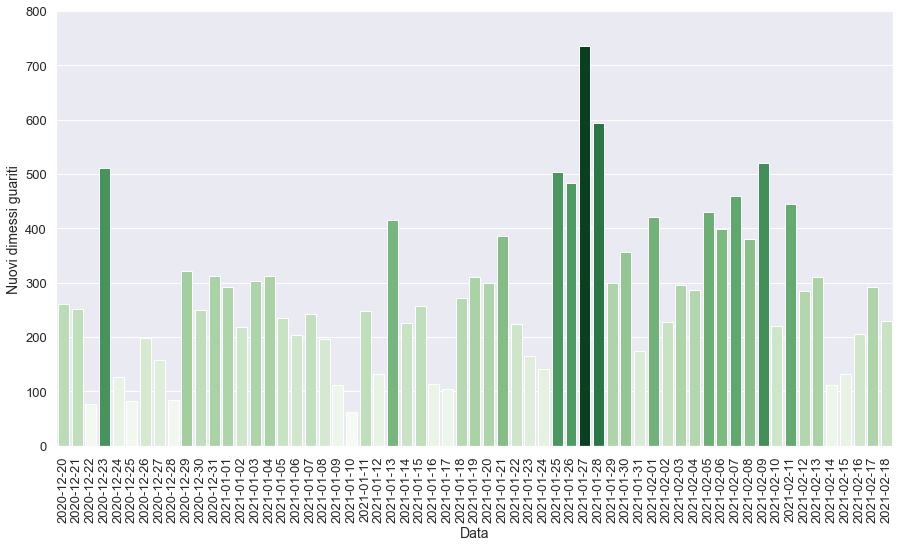

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-19T17:00:00,18,Calabria,305,24,329,9766,10095,-119,191,...,0.0,2466.0,2140.0,-112.0,7.29,3.26,7.75,8.93,0.00,-1.17
1,2021-01-20T17:00:00,18,Calabria,303,27,330,9775,10105,10,313,...,4.0,3162.0,2436.0,9.0,8.18,3.27,9.90,12.85,12.50,0.10
2,2021-01-21T17:00:00,18,Calabria,297,26,323,9645,9968,-137,258,...,9.0,2986.0,2354.0,-130.0,8.05,3.24,8.64,10.96,-3.70,-1.36
3,2021-01-22T17:00:00,18,Calabria,278,24,302,9804,10106,138,368,...,6.0,3119.0,2739.0,159.0,7.95,2.99,11.80,13.44,-7.69,1.38
4,2021-01-23T17:00:00,18,Calabria,275,24,299,10041,10340,234,402,...,3.0,2924.0,2752.0,237.0,8.03,2.89,13.75,14.61,0.00,2.32
5,2021-01-24T17:00:00,18,Calabria,279,21,300,10105,10405,65,211,...,5.0,2013.0,1821.0,64.0,7.00,2.88,10.48,11.59,-12.50,0.63
6,2021-01-25T17:00:00,18,Calabria,278,22,300,9803,10103,-302,207,...,6.0,1577.0,831.0,-302.0,7.33,2.97,13.13,24.91,4.76,-2.90
7,2021-01-26T17:00:00,18,Calabria,283,19,302,9544,9846,-257,232,...,5.0,2522.0,1815.0,-259.0,6.29,3.07,9.20,12.78,-13.64,-2.54
8,2021-01-27T17:00:00,18,Calabria,274,22,296,9077,9373,-473,263,...,1.0,3129.0,2833.0,-467.0,7.43,3.16,8.41,9.28,15.79,-4.80
9,2021-01-28T17:00:00,18,Calabria,273,21,294,8784,9078,-295,302,...,4.0,2835.0,2823.0,-293.0,7.14,3.24,10.65,10.70,-4.55,-3.15


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

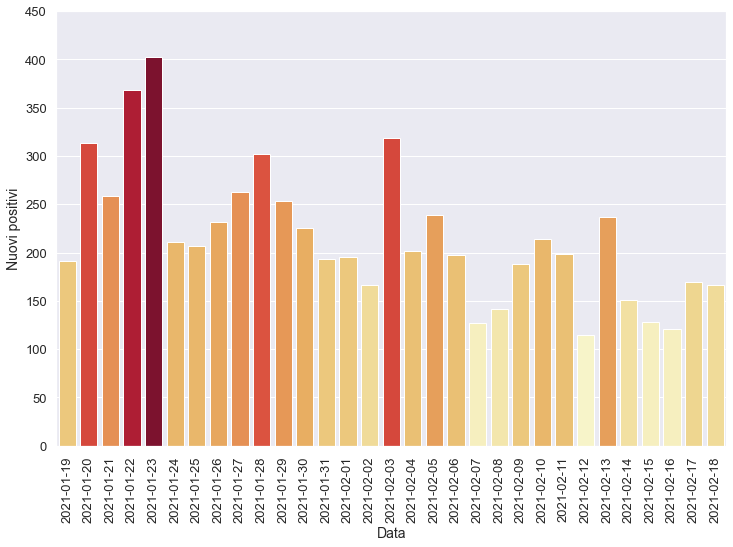

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

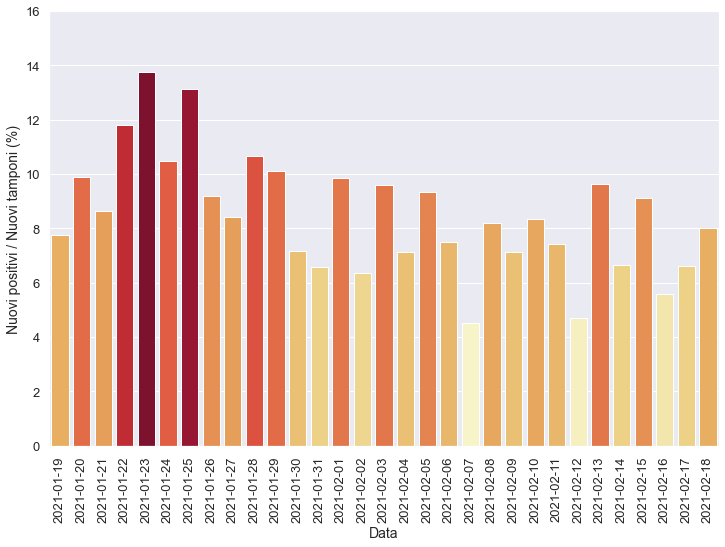

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

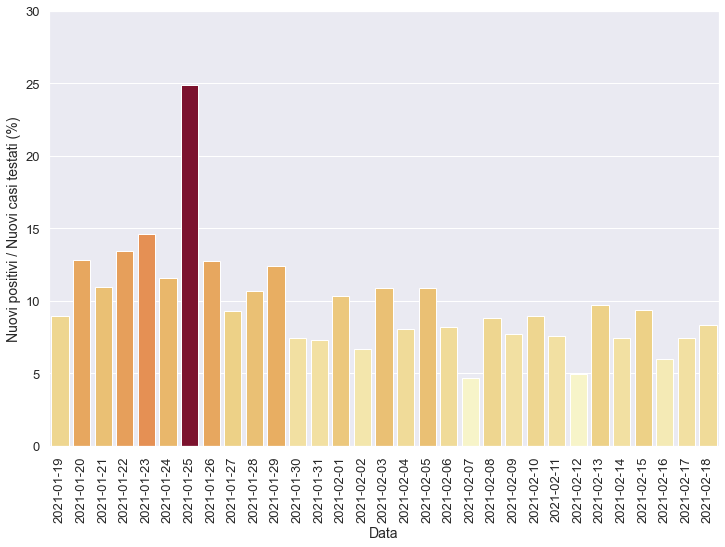

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

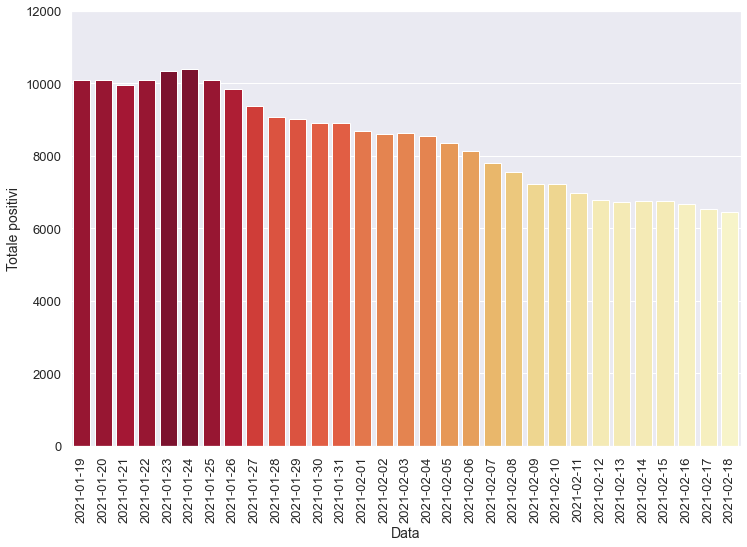

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

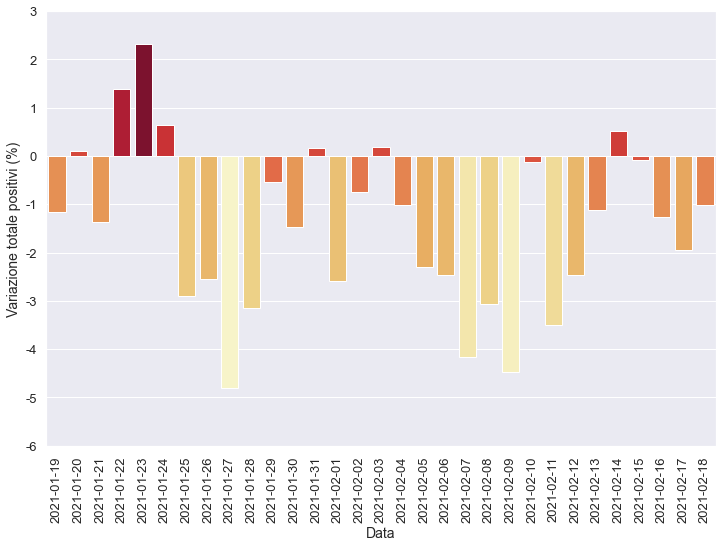

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

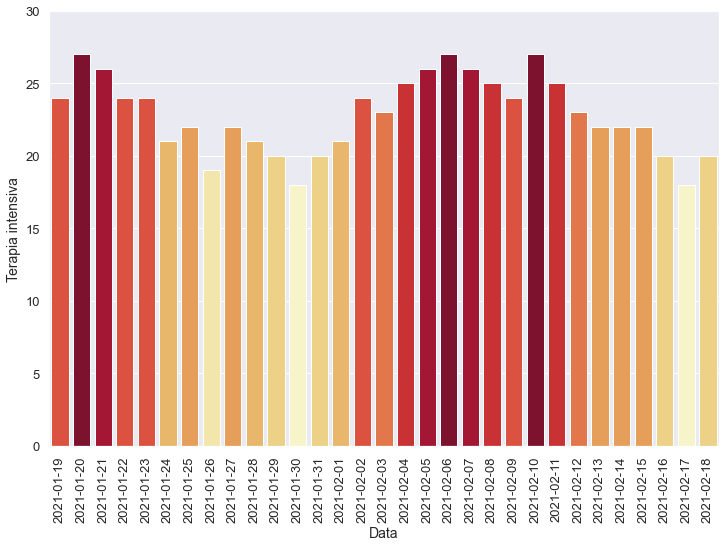

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

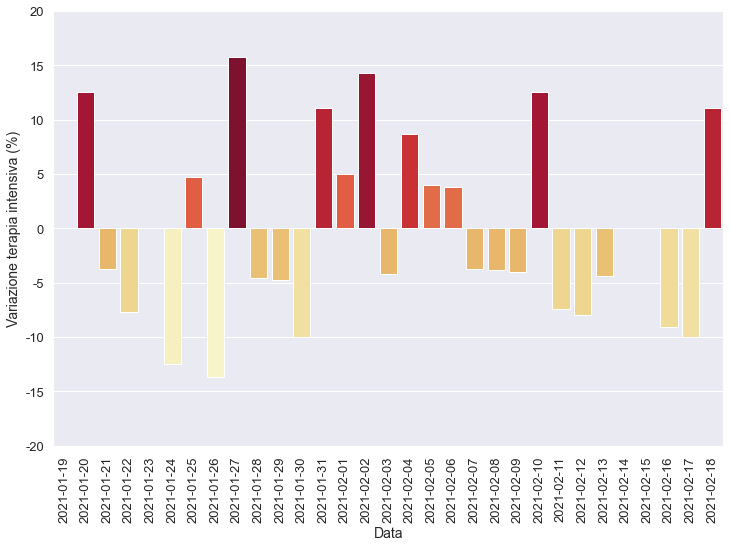

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

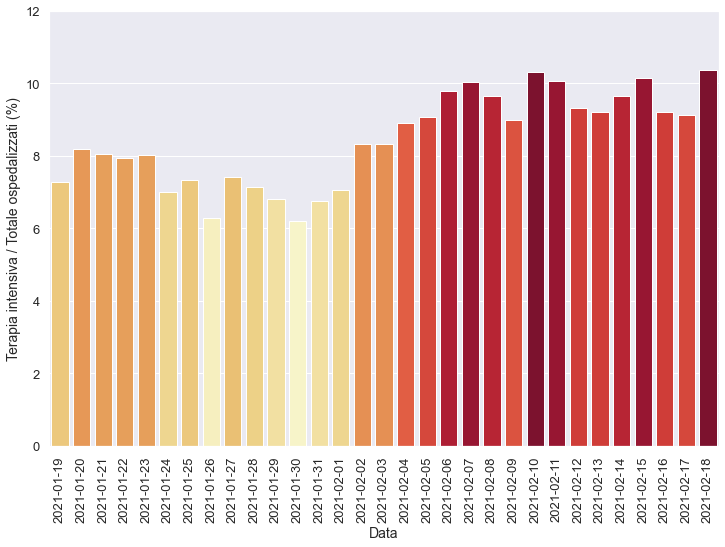

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

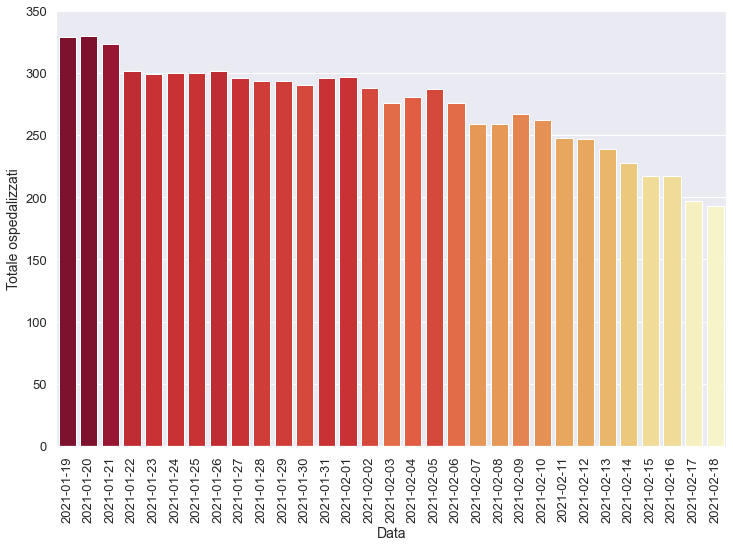

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

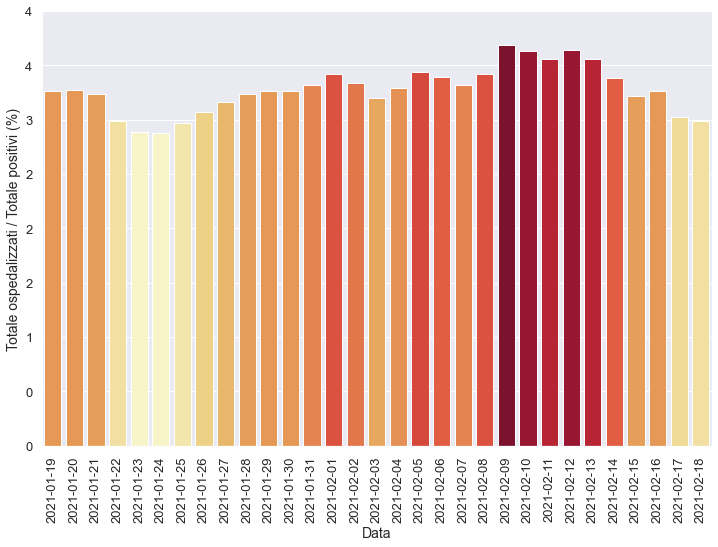

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

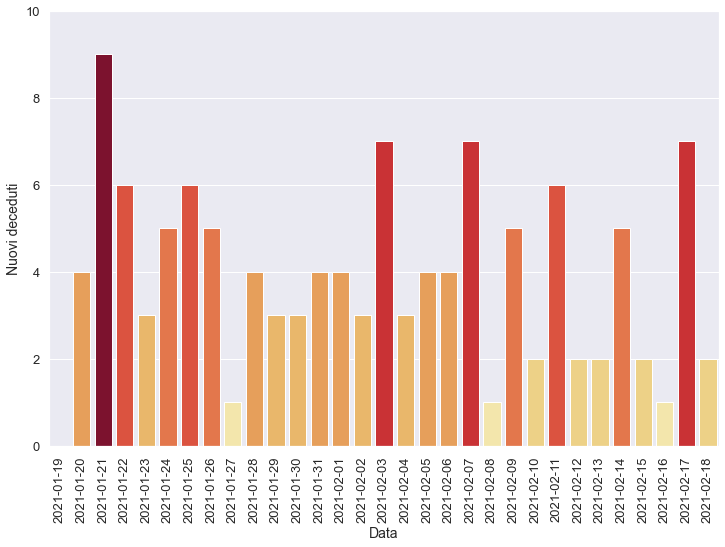

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

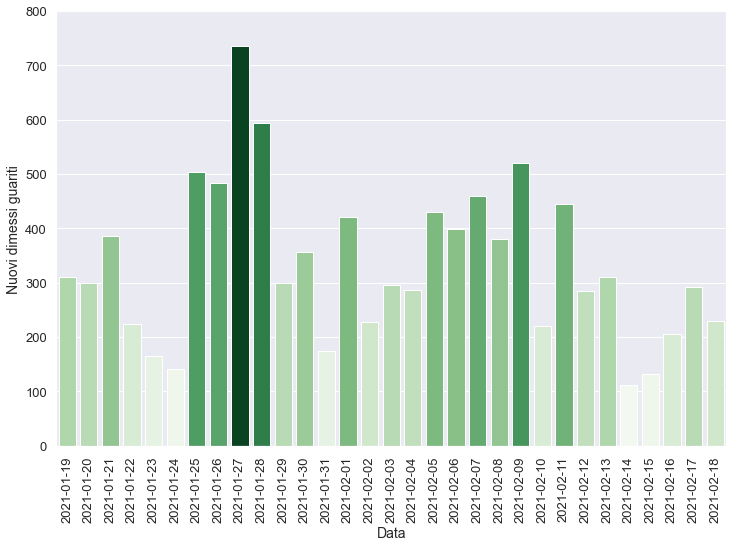

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-11T17:00:00,18,Calabria,223,25,248,6716,6964,-253,198,...,6.0,2660.0,2616.0,-239.0,10.08,3.56,7.44,7.57,-7.41,-3.51
1,2021-02-12T17:00:00,18,Calabria,224,23,247,6546,6793,-171,115,...,2.0,2445.0,2311.0,-170.0,9.31,3.64,4.70,4.98,-8.00,-2.46
2,2021-02-13T17:00:00,18,Calabria,217,22,239,6478,6717,-76,237,...,2.0,2459.0,2444.0,-68.0,9.21,3.56,9.64,9.70,-4.35,-1.12
3,2021-02-14T17:00:00,18,Calabria,206,22,228,6524,6752,35,151,...,5.0,2271.0,2035.0,46.0,9.65,3.38,6.65,7.42,0.00,0.52
4,2021-02-15T17:00:00,18,Calabria,195,22,217,6529,6746,-6,128,...,2.0,1406.0,1364.0,5.0,10.14,3.22,9.10,9.38,0.00,-0.09
5,2021-02-16T17:00:00,18,Calabria,197,20,217,6443,6660,-86,121,...,1.0,2171.0,2020.0,-86.0,9.22,3.26,5.57,5.99,-9.09,-1.27
6,2021-02-17T17:00:00,18,Calabria,179,18,197,6334,6531,-129,170,...,7.0,2567.0,2277.0,-109.0,9.14,3.02,6.62,7.47,-10.00,-1.94
7,2021-02-18T17:00:00,18,Calabria,173,20,193,6272,6465,-66,166,...,2.0,2069.0,1989.0,-62.0,10.36,2.99,8.02,8.35,11.11,-1.01


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

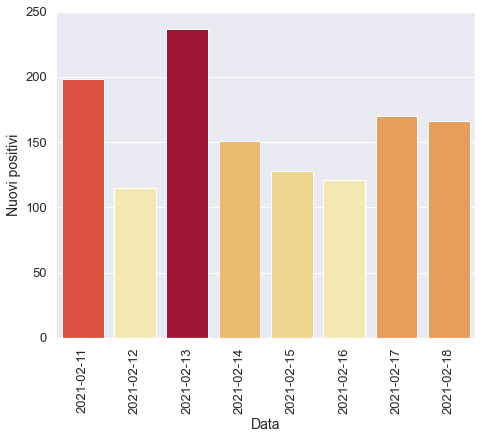

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

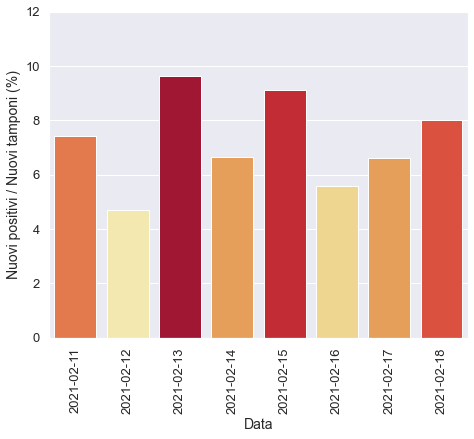

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

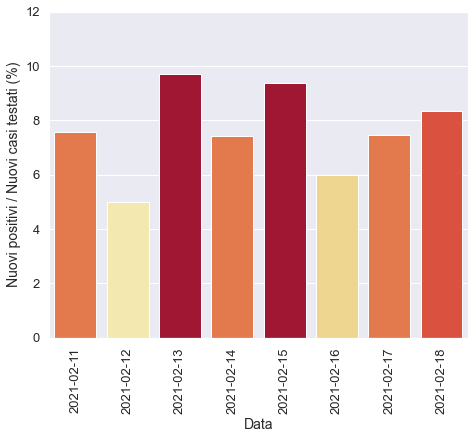

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

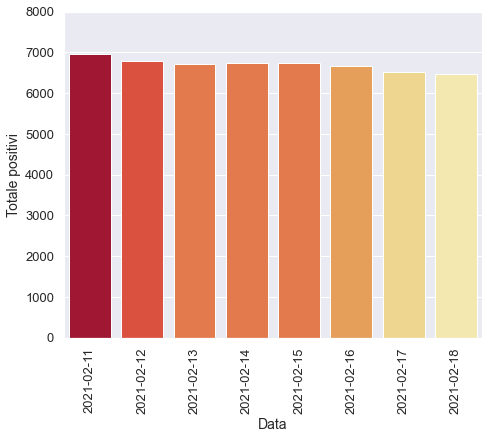

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

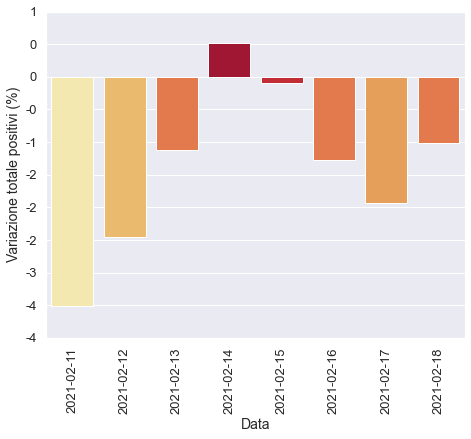

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

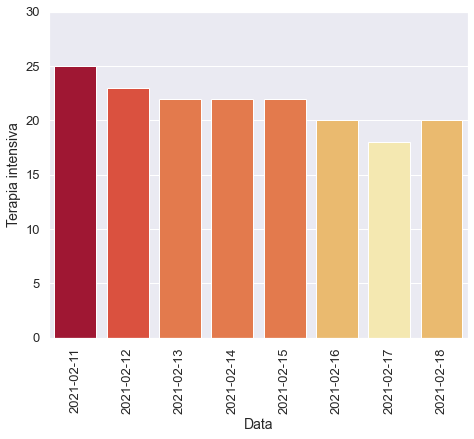

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

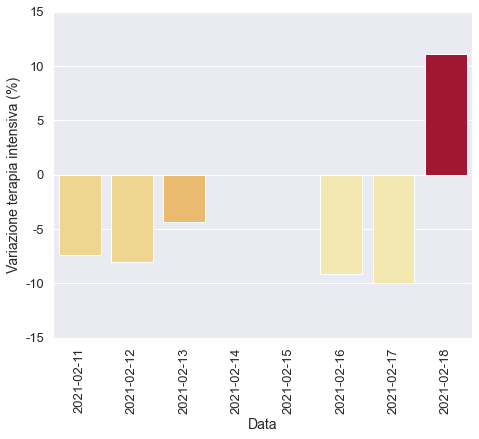

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

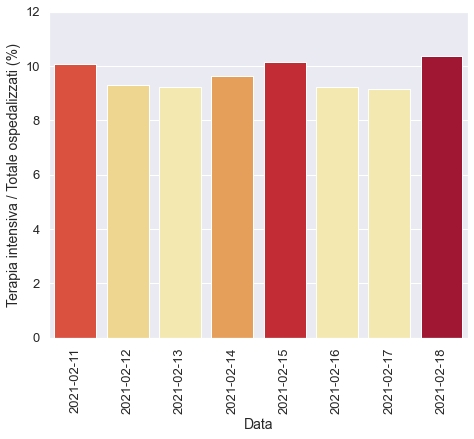

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

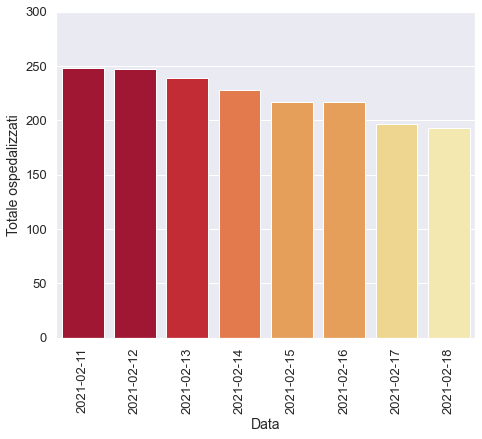

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

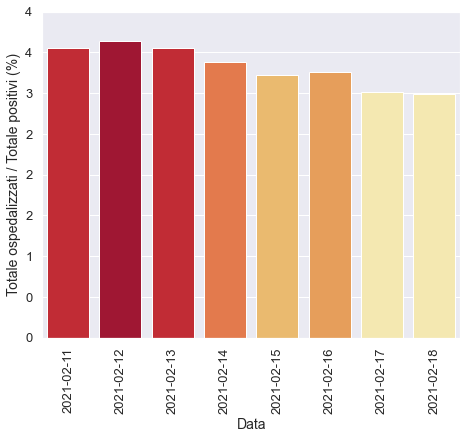

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

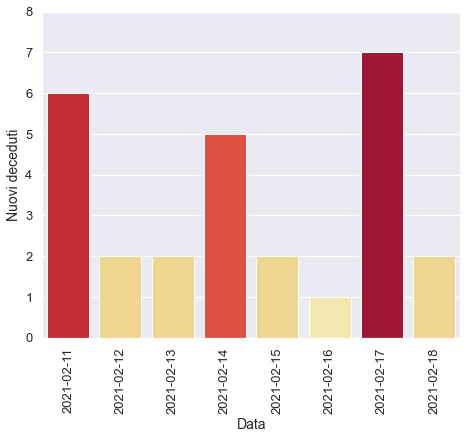

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

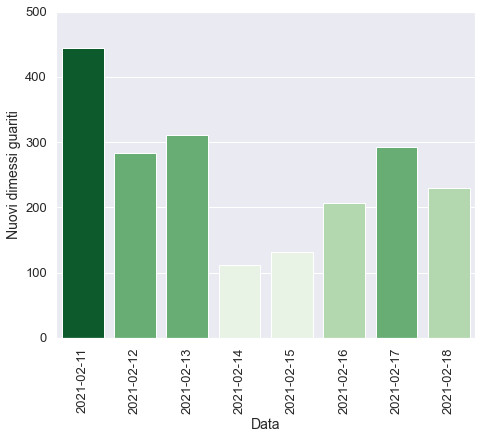

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)